K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sb
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

In [2]:
df=pd.DataFrame(pd.read_csv("E:\\Study\\AIDS\\DS\\ML\\Iris.csv"))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
ds=df.drop(columns="Species")
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


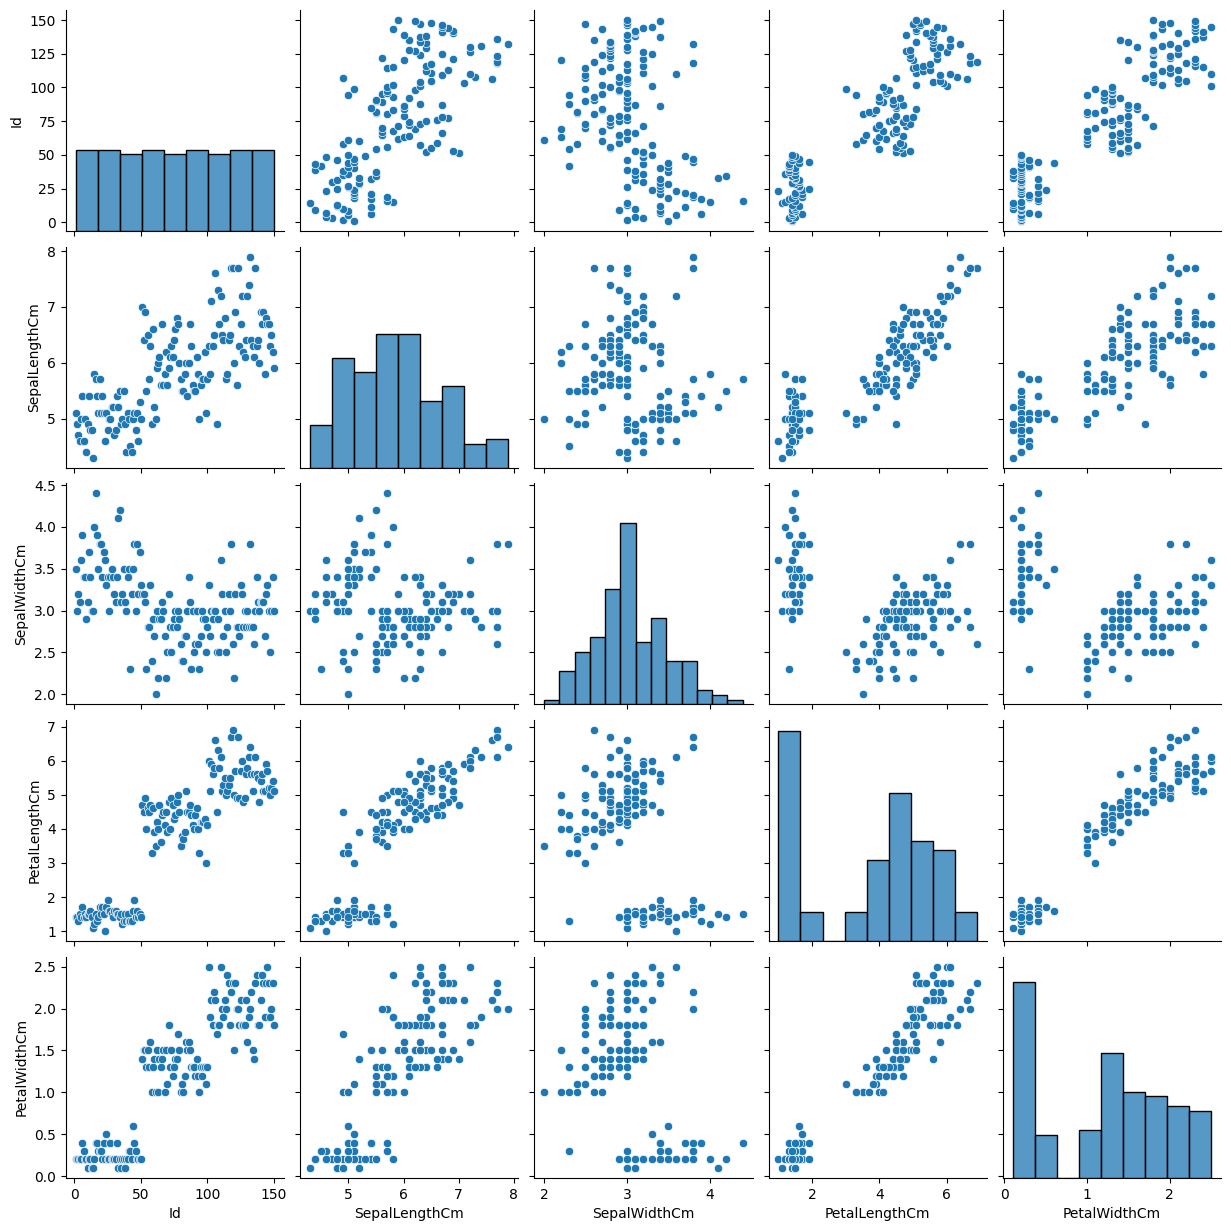

In [5]:
sb.pairplot(ds)
mat.show()

In [6]:
from sklearn.cluster import KMeans,kmeans_plusplus

In [7]:
wcss=[]
for i in range(2,21):
    km=KMeans(n_clusters=i,init="k-means++")
    km.fit(ds)
    wcss.append(km.inertia_)
wcss

[70616.29893333332,
 31365.589670588237,
 17885.347575543587,
 11598.2843733165,
 7942.141827777778,
 6155.543767291845,
 4814.402485472501,
 4098.2710063700915,
 3038.332364407651,
 2551.2103649487767,
 2116.110851481851,
 1872.4968303363303,
 1620.6817319347322,
 1388.5408484848485,
 1215.332702020202,
 1132.3129437229438,
 1025.2815555555555,
 917.2984087301587,
 830.2618650793651]

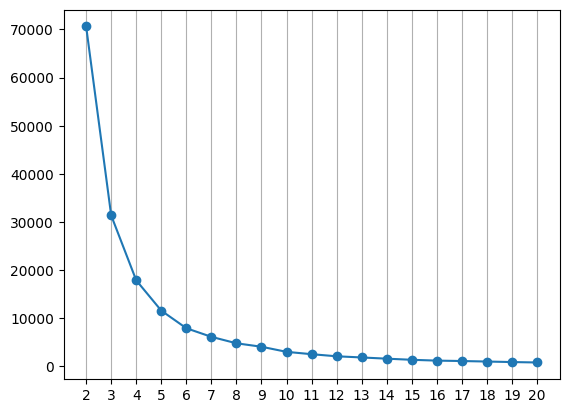

In [8]:
mat.plot([i for i in range(2,21)],wcss,marker="o")
mat.grid(axis="x")
mat.xticks([i for i in range(2,21)])#becuase the x axis values are in decimal thats y to bring it to natural number
mat.show()

In [28]:
kmn=KMeans(n_clusters=3)
ds["Predict"]=kmn.fit_predict(ds)
ds

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predict
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [29]:
kmn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_score(ds,kmn.labels_)

0.5821053914495046

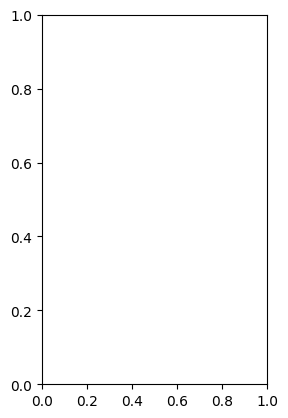

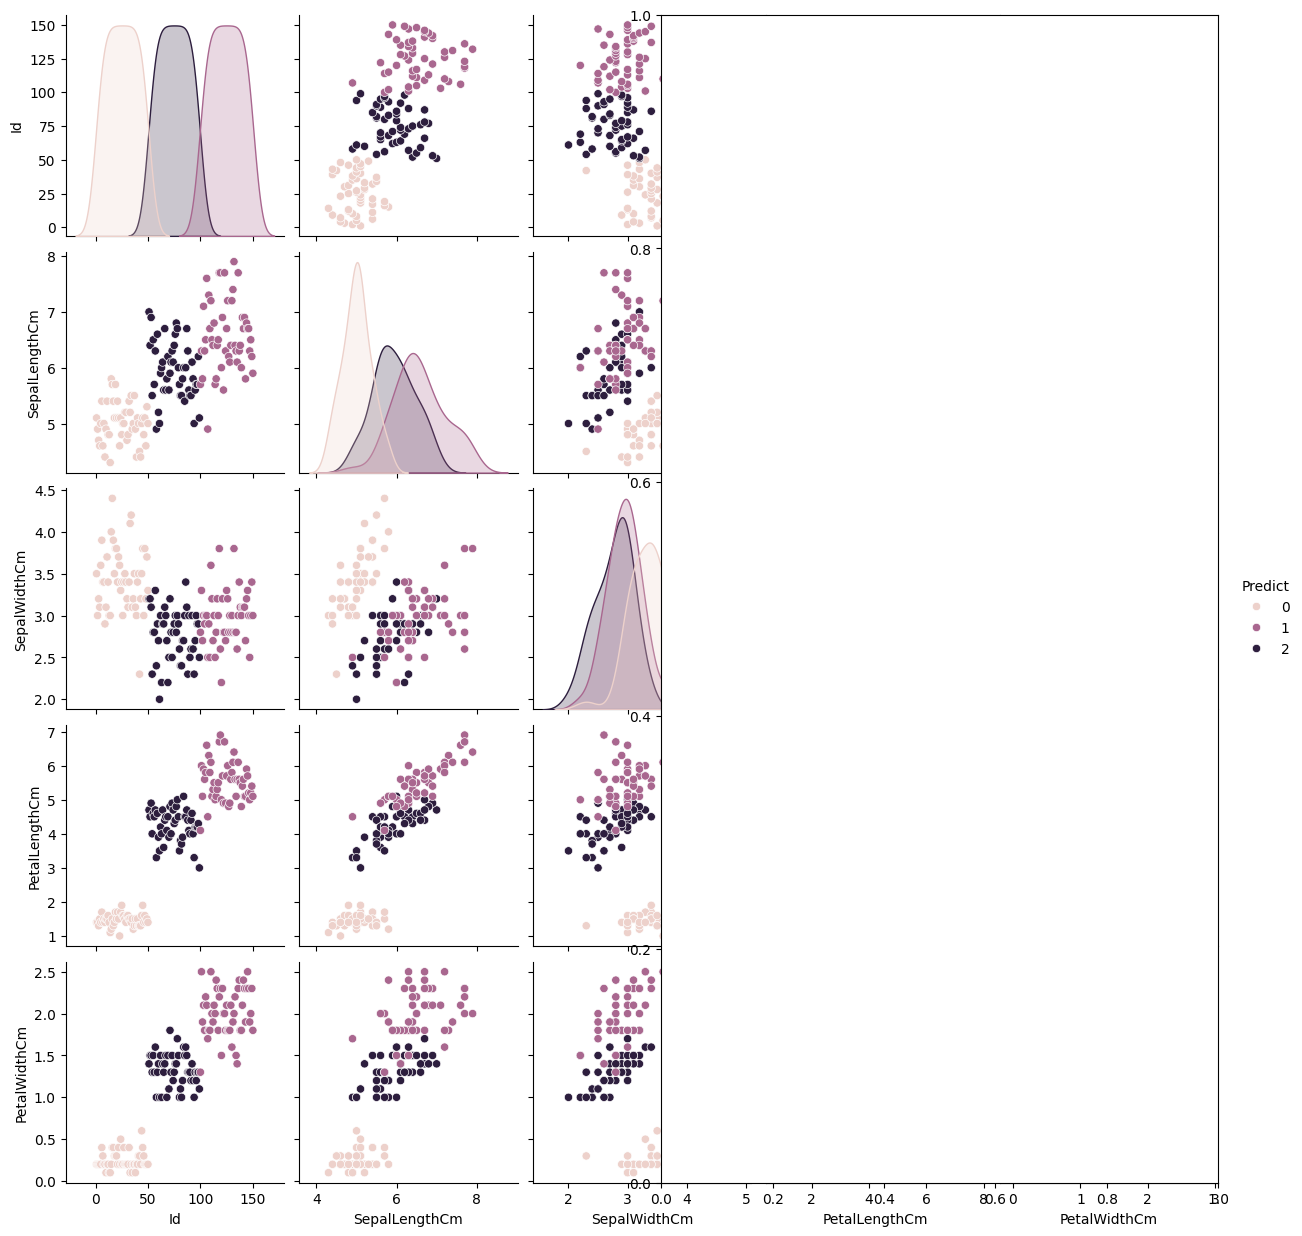

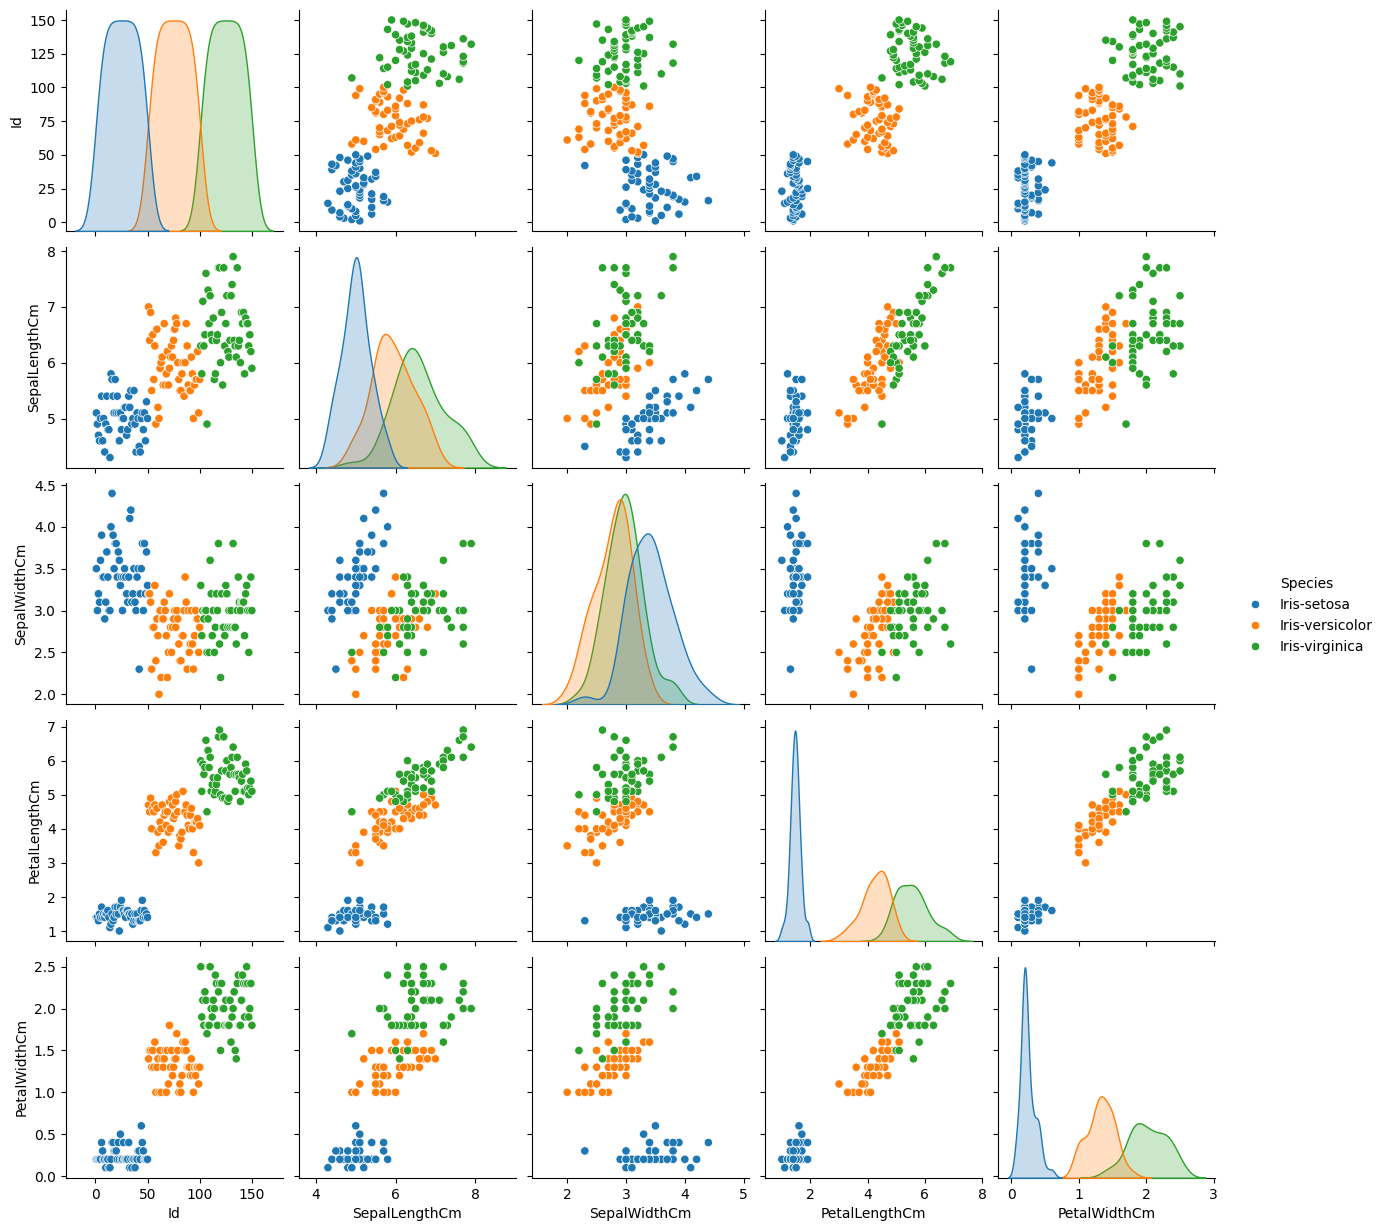

In [32]:
mat.subplot(1,2,1)
sb.pairplot(ds,hue="Predict")
mat.subplot(1,2,2)
sb.pairplot(df,hue="Species")
mat.show()

Silhouette Score

In [35]:
ss=[]
no_c=[j for j in range(2,21)]
for i in range(2,21):
    km1=KMeans(n_clusters=i)
    km1.fit(ds)
    ss.append(silhouette_score(ds,km1.labels_))


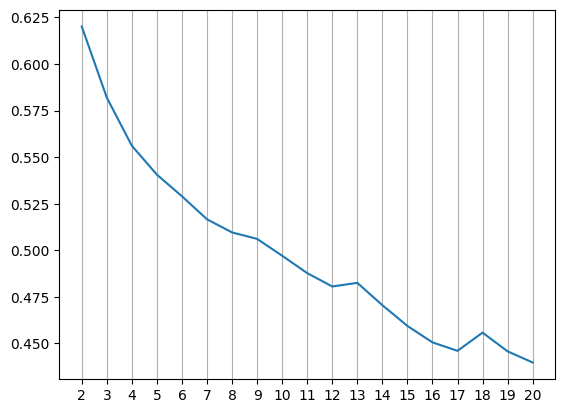

In [39]:
mat.plot(no_c,ss)
mat.xticks(no_c)
mat.grid(axis="x")
mat.show()